In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
img = mpimg.imread('/content/rose.jpg')
print(img)

[[[ 64  67  82]
  [ 65  68  83]
  [ 66  69  84]
  ...
  [ 85  86 107]
  [ 83  84 105]
  [ 82  83 104]]

 [[ 65  68  83]
  [ 66  69  84]
  [ 67  70  85]
  ...
  [ 86  87 108]
  [ 84  85 106]
  [ 83  84 105]]

 [[ 66  69  84]
  [ 67  70  85]
  [ 68  71  86]
  ...
  [ 87  88 109]
  [ 86  87 108]
  [ 84  85 106]]

 ...

 [[ 57  56  52]
  [ 57  56  52]
  [ 58  57  53]
  ...
  [ 71  70  78]
  [ 71  69  80]
  [ 70  68  79]]

 [[ 57  56  52]
  [ 57  56  52]
  [ 58  57  53]
  ...
  [ 71  70  78]
  [ 70  68  79]
  [ 70  68  79]]

 [[ 57  56  52]
  [ 57  56  52]
  [ 58  57  53]
  ...
  [ 71  70  78]
  [ 70  68  79]
  [ 69  67  78]]]


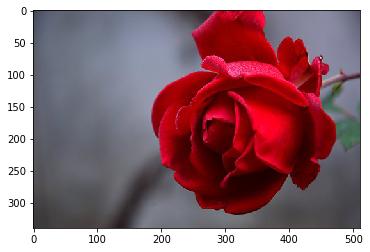

In [4]:
imgplot = plt.imshow(img)

In [5]:
img.shape

(340, 511, 3)

In [6]:
img.dtype

dtype('uint8')

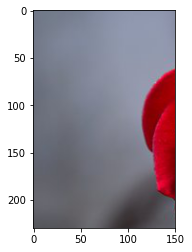

In [7]:
plt.imshow(img[50:280, 70:220], cmap=plt.cm.gray, interpolation='bilinear')   

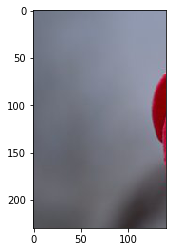

In [8]:
plt.imshow(img[60:290, 60:200], cmap=plt.cm.gray, interpolation='nearest') 

In [9]:
img[10:13,20:23]

array([[[ 88,  95, 113],
        [ 89,  96, 114],
        [ 90,  97, 115]],

       [[ 89,  96, 114],
        [ 90,  97, 115],
        [ 90,  97, 115]],

       [[ 89,  96, 114],
        [ 90,  97, 115],
        [ 91,  98, 116]]], dtype=uint8)

In [10]:
lx, ly, z = img.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
img[mask] = 0
# Fancy indexing
img[range(400), range(400)] = 255

ValueError: ignored

In [0]:
f = img[50:280, 70:220]

In [12]:
img.mean()

89.00795441464257

In [13]:
img.max()

255

In [14]:
img.min()

0

In [0]:
import scipy.ndimage as ndimage
lx, ly,z = img.shape
# Cropping
crop_face = img[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(img)
# rotation
rotate_face = ndimage.rotate(img, 45)
rotate_face_noreshape = ndimage.rotate(img, 45, reshape=False)

In [16]:
rotate_face

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

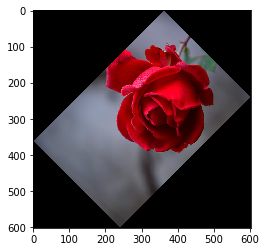

In [17]:
plt.imshow(rotate_face)

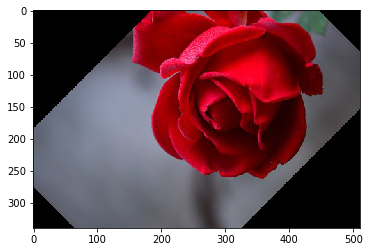

In [18]:
plt.imshow(rotate_face_noreshape)

In [0]:
blurred = ndimage.gaussian_filter(img, sigma=3)
very_blurred = ndimage.gaussian_filter(img, sigma=5)

In [20]:
blurred

array([[[73, 73, 74],
        [73, 73, 74],
        [74, 74, 75],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[73, 73, 74],
        [73, 73, 74],
        [74, 74, 75],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[73, 73, 74],
        [74, 74, 74],
        [74, 74, 75],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [93, 93, 93]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]],

       [[55, 55, 54],
        [55, 55, 54],
        [55, 55, 54],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]]], dtype=uint8)

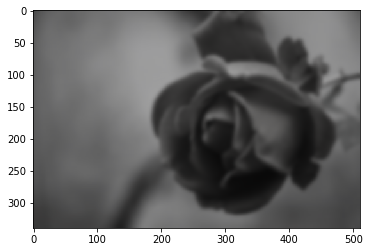

In [21]:
plt.imshow(blurred)

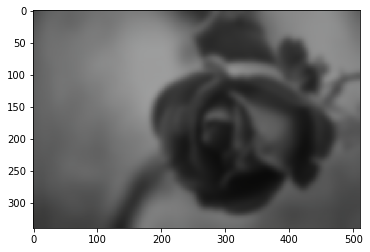

In [22]:
plt.imshow(very_blurred)

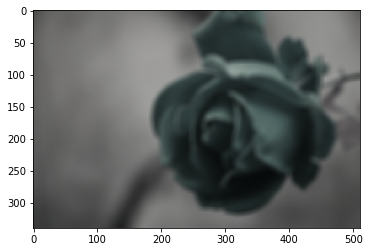

In [23]:
local_mean = ndimage.uniform_filter(img, size=11)
plt.imshow(local_mean)

In [0]:
filter_blurred_f = ndimage.gaussian_filter(blurred, 1)
alpha = 20
sharpened = blurred + alpha * (blurred - filter_blurred_f)

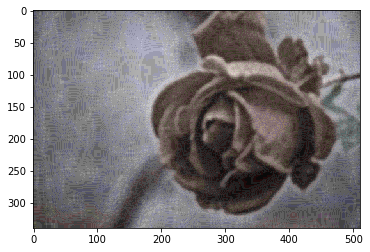

In [25]:
plt.imshow(sharpened)

In [0]:
f = img[50:280, 70:220]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [0]:
gauss_denoised = ndimage.gaussian_filter(img, 2)

In [0]:
med_denoised = ndimage.median_filter(img, 3)


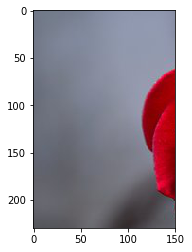

In [29]:
plt.imshow(f)

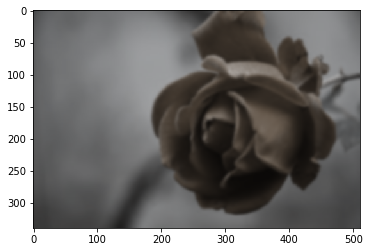

In [30]:
plt.imshow(gauss_denoised)

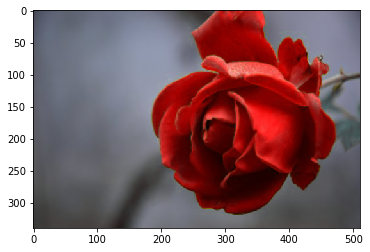

In [31]:
plt.imshow(med_denoised)